In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


In [4]:
#supress warning

import warnings
warnings.filterwarnings("ignore")

In [5]:
#save file path
real_estate_file_path = '/kaggle/input/real-estate-price-prediction/Real estate.csv'
#read data and store data
real_estate = pd.read_csv(real_estate_file_path)
#summary of real_estate data
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#inspect various aspect of dataframe

real_estate.shape

(414, 8)

In [7]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
#to check the null values
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

There is no null value present in dataset.

In [9]:
#describe the data
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
#There is no need of 'No' column and 'Date' column, hence we can drop it without afftecting our predictions.
real_estate.drop(['No'], axis=1, inplace=True)
real_estate.drop(['X1 transaction date'],axis=1, inplace=True)

In [11]:
#check dataset after dropping 'No' col
real_estate.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


Data Visualization

<Figure size 432x864 with 0 Axes>

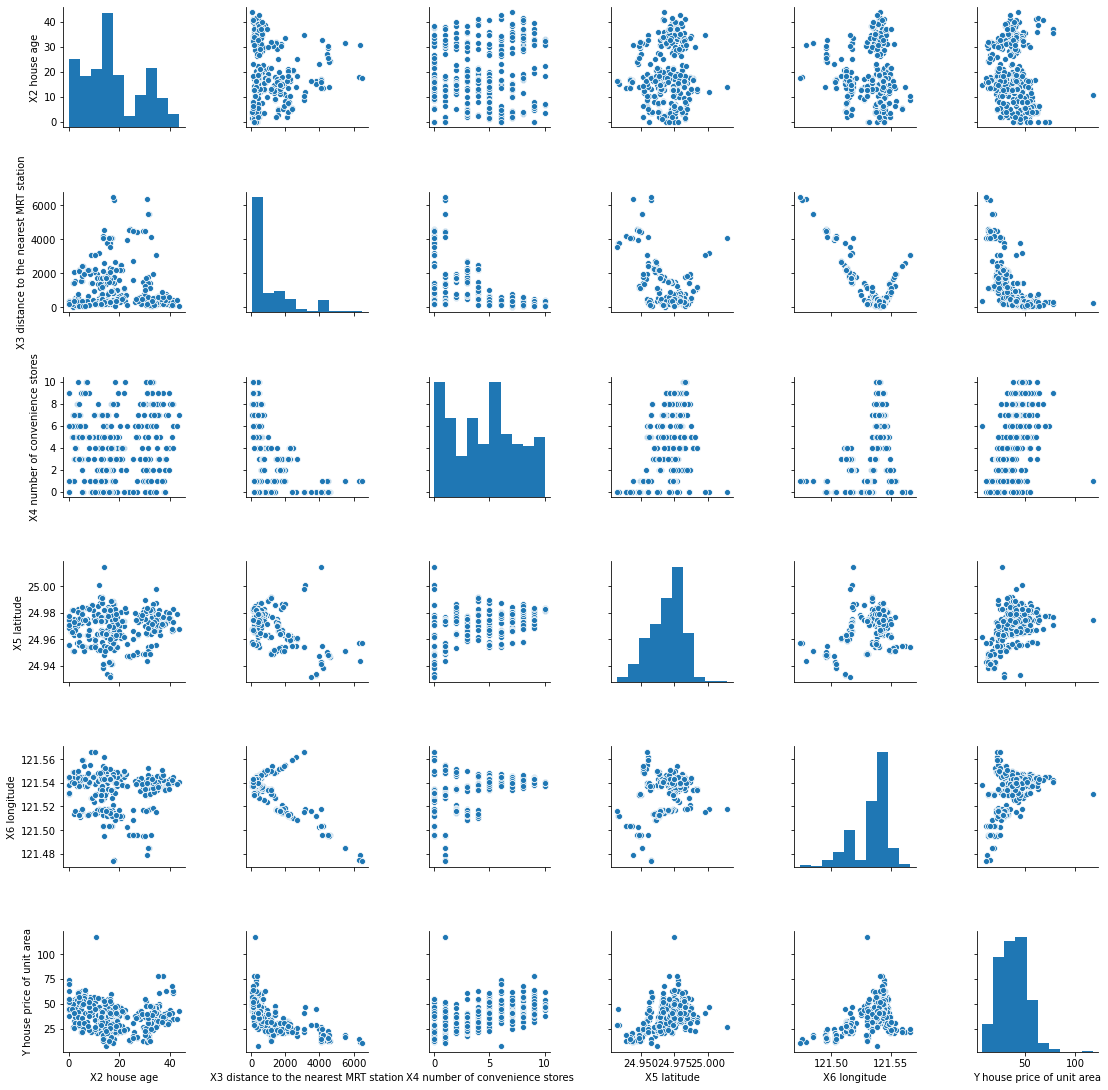

In [12]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate)
plt.show()

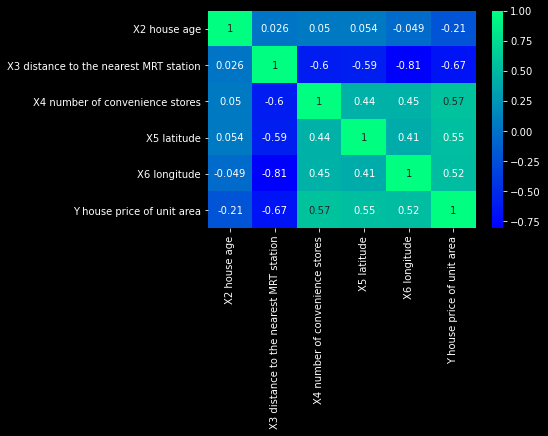

In [13]:
from matplotlib import style 
style.use("dark_background")
sns.heatmap(real_estate.corr(),annot=True,cmap="winter")

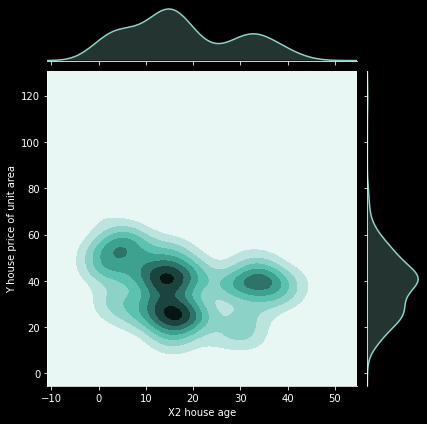

In [14]:
sns.jointplot(x="X2 house age",y="Y house price of unit area",data=real_estate,kind='kde')

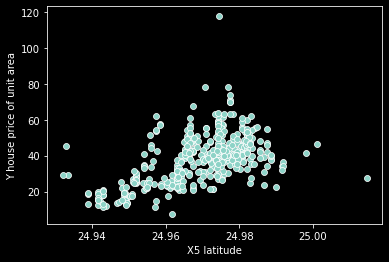

In [15]:
sns.scatterplot(x="X5 latitude",y="Y house price of unit area",data=real_estate)

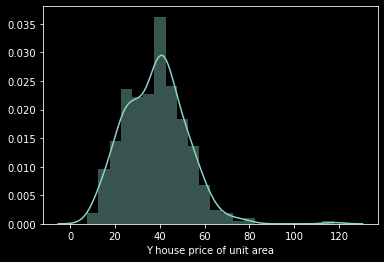

In [16]:
sns.distplot(real_estate["Y house price of unit area"])

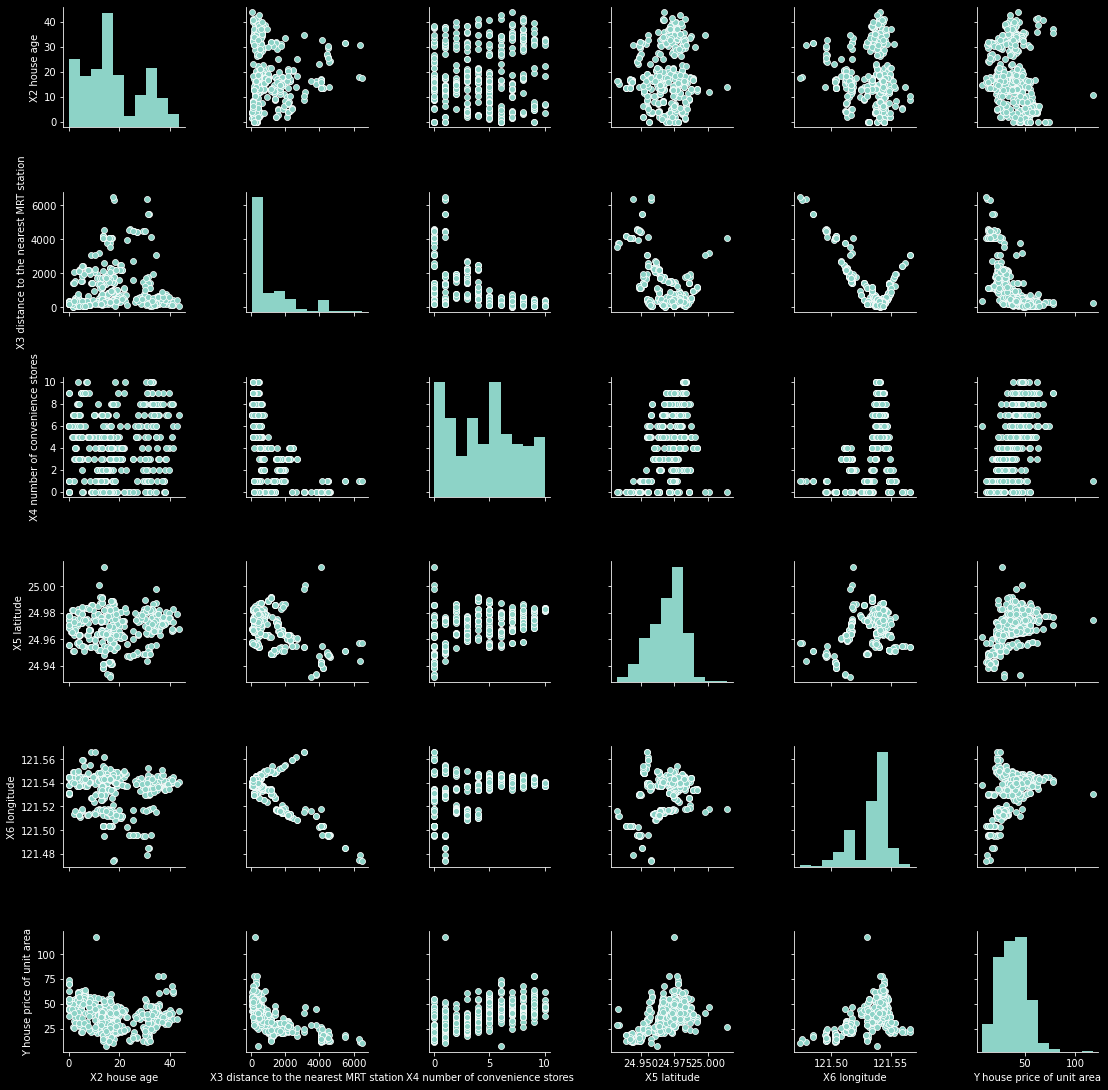

In [17]:
# pair plot in dark theme
sns.pairplot(real_estate)

In [25]:
# checking the columns before moving to plit data into train and test
real_estate.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Data splitting to Training and Testing model

In [23]:
#importing required libraries from scikit learn to spilt in train - test
from sklearn.model_selection import train_test_split,KFold,cross_val_score

np.random.seed(0)

df_train,df_test = train_test_split(real_estate, train_size=0.70, test_size=0.30,random_state=100)
print(df_train.head())
print(df_test.head())


     X2 house age  X3 distance to the nearest MRT station  \
287          19.2                                461.1016   
31           29.6                                769.4034   
209          34.8                                175.6294   
239          18.1                                837.7233   
47           35.9                                640.7391   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
287                                5     24.95425     121.53990   
31                                 7     24.98281     121.53408   
209                                8     24.97347     121.54271   
239                                0     24.96334     121.54767   
47                                 3     24.97563     121.53715   

     Y house price of unit area  
287                        32.9  
31                         25.0  
209                        40.9  
239                        29.7  
47                         61.5  
     X2 house age  X3 dist

In [24]:
#Dividing X and y sets for model building
y_train = df_train.pop('Y house price of unit area')
X_train = df_train
print(y_train.head())
print(X_train.head())

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
Name: Y house price of unit area, dtype: float64
     X2 house age  X3 distance to the nearest MRT station  \
287          19.2                                461.1016   
31           29.6                                769.4034   
209          34.8                                175.6294   
239          18.1                                837.7233   
47           35.9                                640.7391   

     X4 number of convenience stores  X5 latitude  X6 longitude  
287                                5     24.95425     121.53990  
31                                 7     24.98281     121.53408  
209                                8     24.97347     121.54271  
239                                0     24.96334     121.54767  
47                                 3     24.97563     121.53715  


# Data Modelling and Evaluation

In [26]:
#import Linear regression
from sklearn.linear_model import LinearRegression

In [27]:
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.coef_

array([-2.81980885e-01, -4.70761718e-03,  1.08604498e+00,  2.12564677e+02,
       -3.80314555e+01])

In [29]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
X2 house age,-0.281981
X3 distance to the nearest MRT station,-0.004708
X4 number of convenience stores,1.086045
X5 latitude,212.564677
X6 longitude,-38.031455


In [31]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.942
Model:                                    OLS   Adj. R-squared (uncentered):              0.941
Method:                         Least Squares   F-statistic:                              930.6
Date:                        Wed, 04 Nov 2020   Prob (F-statistic):                   9.41e-174
Time:                                19:16:23   Log-Likelihood:                         -1065.4
No. Observations:                         289   AIC:                                      2141.
Df Residuals:                             284   BIC:                                      2159.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.071049e+08
1,X2 house age,1.020000e+00
2,X3 distance to the nearest MRT station,4.510000e+00
3,X4 number of convenience stores,1.600000e+00
4,X5 latitude,1.590000e+00
5,X6 longitude,3.170000e+00


All features p-value is significant and vif is less than 5. Hence no need to remove any feature.

# Residual Analysis of train data

In [36]:
y_train_price = lm_1.predict(X_train)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_price)

0.5419598025452574

Text(0.5, 0, 'Error')

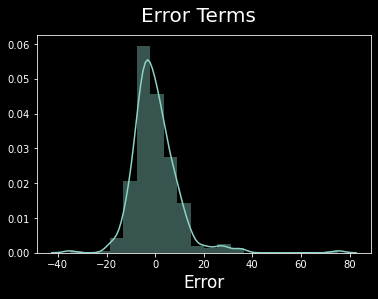

In [38]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

Here error terms has come in normal error distribution

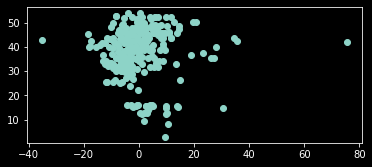

In [41]:
#residual error scatter plot of error terms

residual = y_train-y_train_price

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_train_price)

# Making Prediction on Final model

In [43]:
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

In [45]:
y_test_pred = lm_1.predict(X_test)

Calculating R2 Value now

In [47]:
#import library
from sklearn.metrics import r2_score
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6584961501011843

In [48]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
121,48.0,42.0
353,31.3,36.0
96,59.5,52.0
43,34.1,42.0
125,48.6,48.0


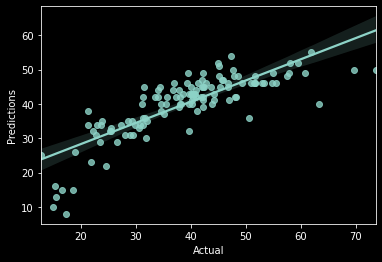

In [49]:
sns.regplot('Actual','Predictions',data=df)

# Evaluating Model performance

In [50]:
from sklearn import metrics

#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))
#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE 5.423374508833555
MSE 47.86553891850871
RMSE 6.91849253222902


# Using LightGBM this time for Predicting Prices

In [63]:
from lightgbm import LGBMRegressor
model=LGBMRegressor(n_estimators=1000)
model.fit(X_train,y_train)
kfold=KFold(n_splits=10)
print(model)
res=cross_val_score(model,X_train,y_train,cv=kfold)
print(res.mean()*100)

LGBMRegressor(n_estimators=1000)
52.13204241141926


In [56]:
yp=model.predict(X_train)

import statsmodels.api as sm
model1= sm.WLS(y_train,X_train).fit()
model1.params

X2 house age                               -0.282236
X3 distance to the nearest MRT station     -0.004764
X4 number of convenience stores             1.085764
X5 latitude                               211.280965
X6 longitude                              -43.045359
dtype: float64

In [57]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     WLS Regression Results                                    
===============================================================================================
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.942
Model:                                    WLS   Adj. R-squared (uncentered):              0.941
Method:                         Least Squares   F-statistic:                              930.6
Date:                        Wed, 04 Nov 2020   Prob (F-statistic):                   9.41e-174
Time:                                20:55:25   Log-Likelihood:                         -1065.4
No. Observations:                         289   AIC:                                      2141.
Df Residuals:                             284   BIC:                                      2159.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
X2 house age                              -0.2822      0.050     -5.654      0.000      -0.380      -0.184
X3 distance to the nearest MRT station    -0.0048      0.001     -8.384      0.000      -0.006      -0.004
X4 number of convenience stores            1.0858      0.238      4.565      0.000       0.618       1.554
X5 latitude                              211.2810     53.491      3.950      0.000     105.992     316.570
X6 longitude                             -43.0454     10.990     -3.917      0.000     -64.677     -21.414
==============================================================================
Omnibus:                      174.962   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.280
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      16.552   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
yp1=model1.predict(X_test)

#import library
from sklearn.metrics import r2_score
#Evaluate r2
r2_score(y_true=y_test,y_pred=yp1)

0.6584961501011843

In [60]:
df = pd.DataFrame({'Actual':y_test,'Predictions':yp1})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
121,48.0,42.0
353,31.3,36.0
96,59.5,52.0
43,34.1,42.0
125,48.6,48.0


In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(mean_absolute_error(y_test,yp1))
print(mean_squared_error(y_test,yp1))

5.423374508833555
47.86553891850871
